In [3]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial as poly
import cmocean
%matplotlib inline
plt.rcParams["font.size"] = 12
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [5]:
# define params

loc = "/scratch/hcm7920/ambData/channelMean/"

nx = 500
ny = 500
nz = 50
dx = 2000
dy = 2000

g = 9.81
rhoConst = 1000


In [6]:
# load data

saltSteady = np.load(loc+"channelMeanSalt.npy")
VSbar = np.load(loc+"channelMeanVSbar.npy")
WSbar = np.load(loc+"channelMeanWSbar.npy")

levs = np.load(loc+"../grid/gridLevs.npy")
levFaces = np.load(loc+"../grid/gridLevs.npy")


### Calculate
- $\partial_y \overline{s}$
- $\overline{v's'}$

In [7]:
DsaltDy = (saltSteady[:,1:,:]-saltSteady[:,:-1,:]) / dy

**Ensure grid colocation**

In [8]:
VSbar = VSbar[:,1:-1,:]

In [9]:
DsaltDy = DsaltDy[:,100:-100,:]
VSbar = VSbar[:,100:-100,:]

### Calculate $\overline{v's'} / \partial_y \overline{s}$

In [10]:
kappaCalc = VSbar / DsaltDy

/state/partition1/job-48136838/ipykernel_167043/2129682054.py:1: RuntimeWarning: divide by zero encountered in divide
  kappaCalc = VSbar / DsaltDy


### Plot contour of the results

Text(0.5, 1.0, "$-\\overline{v's'} / \\partial_y \\overline{s}$, 100% concentration")

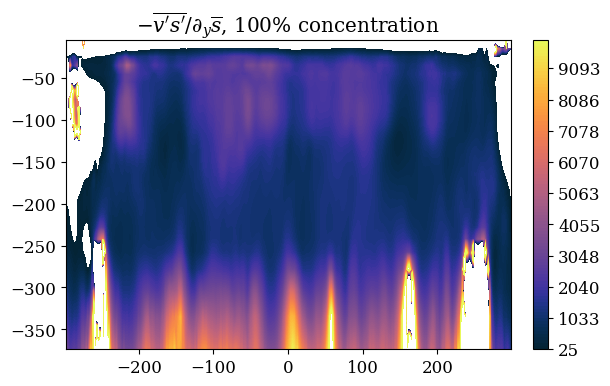

In [11]:
dI = 29
contourLevs = np.linspace(25,10e3,100)
yGrid = np.linspace(-498,498,499)[100:-100]

plt.figure(figsize=(6,3.75),layout="constrained")
plt.contourf(yGrid,levs[:dI],-kappaCalc[:dI,:,-1],contourLevs,
            cmap=cmocean.cm.thermal)
plt.colorbar()
plt.title("$-\overline{v's'} / \partial_y \overline{s}$, 100% concentration")

Text(0.5, 1.0, "$-\\overline{v's'} / \\partial_y \\overline{s}$, 0% concentration")

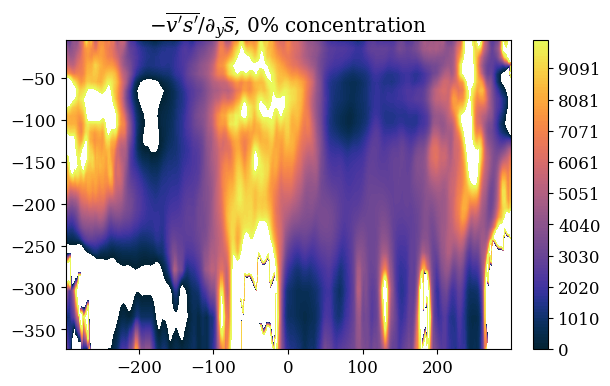

In [12]:
dI = 29
contourLevs = np.linspace(0,10e3,100)
yGrid = np.linspace(-498,498,499)[100:-100]

plt.figure(figsize=(6,3.75),layout="constrained")
plt.contourf(yGrid,levs[:dI],-kappaCalc[:dI,:,0],contourLevs,
            cmap=cmocean.cm.thermal)
plt.colorbar()
plt.title("$-\overline{v's'} / \partial_y \overline{s}$, 0% concentration")

Text(0.5, 1.0, "$-\\overline{v's'} / \\partial_y \\overline{s}$, 40% concentration")

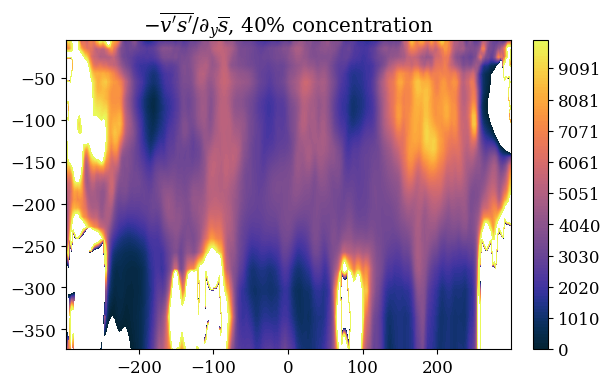

In [13]:
dI = 29
contourLevs = np.linspace(0,10e3,100)
yGrid = np.linspace(-498,498,499)[100:-100]

plt.figure(figsize=(6,3.75),layout="constrained")
plt.contourf(yGrid,levs[:dI],-kappaCalc[:dI,:,2],contourLevs,
            cmap=cmocean.cm.thermal)
plt.colorbar()
plt.title("$-\overline{v's'} / \partial_y \overline{s}$, 40% concentration")

### Scatter plots
### And fit lines

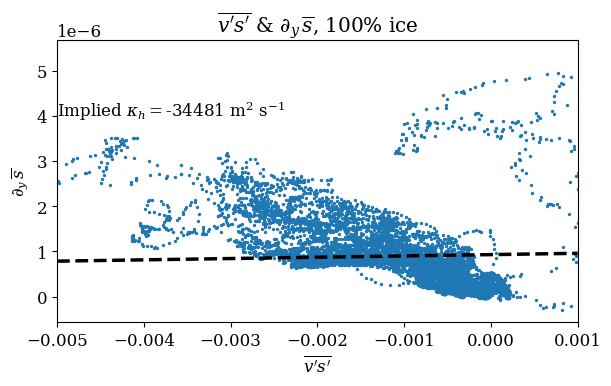

In [58]:
dI = 29
xData = np.ravel(VSbar[:dI,:,-1])
yData = np.ravel(DsaltDy[:dI,:,-1])
xData[(xData>=0) & (yData>=0)] = 0
yData[(xData>=0) & (yData>=0)] = 0

plt.figure(figsize=(6,3.75),layout="constrained")
plt.scatter(xData,yData,s=2)
plt.xlim([-0.005,0.001])
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 100% ice")

seriesFit = poly.fit(xData,yData,1)
lineFit = seriesFit.linspace(5,[-0.005,0.001])
coefFit = seriesFit.convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.005,4e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)


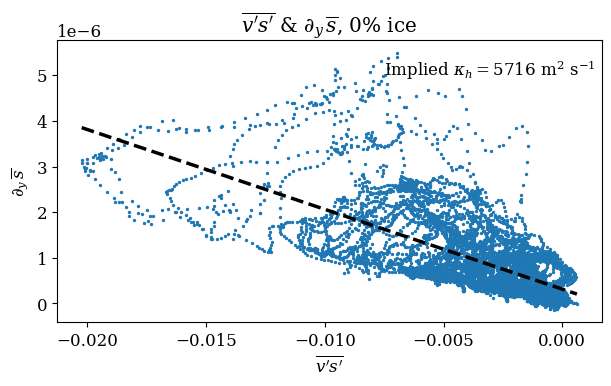

In [42]:
dI = 29
xData = np.ravel(VSbar[:dI,:,0])
yData = np.ravel(DsaltDy[:dI,:,0])

plt.figure(figsize=(6,3.75),layout="constrained")
plt.scatter(xData,yData,s=2)
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 0% ice")

seriesFit = poly.fit(xData,yData,1)
lineFit = seriesFit.linspace(5)
coefFit = seriesFit.convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.0075,5e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)


Text(-0.007, 4e-06, 'Implied $\\kappa_h = $4008 $\\mathrm{m}^2$ $\\mathrm{s}^{-1}$')

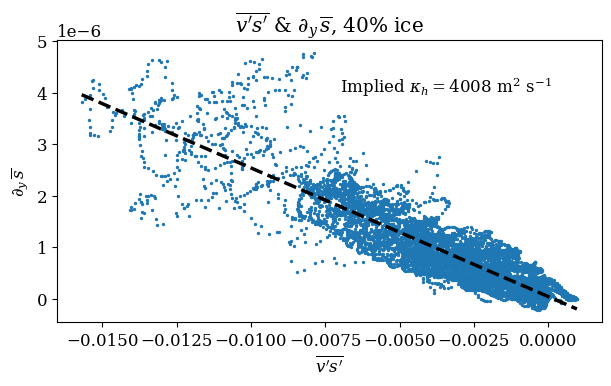

In [35]:
dI = 29
xData = np.ravel(VSbar[:dI,:,2])
yData = np.ravel(DsaltDy[:dI,:,2])

plt.figure(figsize=(6,3.75),layout="constrained")
plt.scatter(xData,yData,s=2)
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 40% ice")

seriesFit = poly.fit(xData,yData,1)
lineFit = seriesFit.linspace(5)
coefFit = seriesFit.convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.007,4e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)


In [30]:
seriesFit.convert().coef

array([ 4.22467219e-08, -2.49508254e-04])

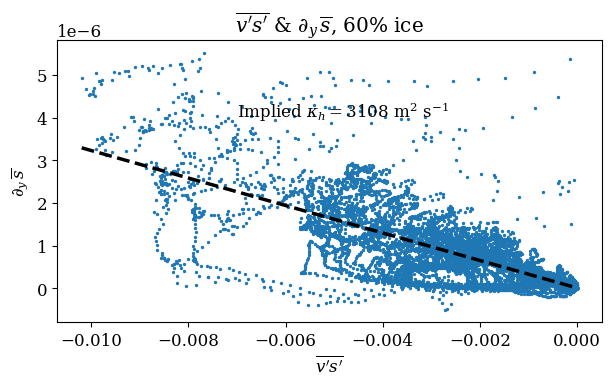

In [48]:
dI = 29
xData = np.ravel(VSbar[:dI,:,3])
yData = np.ravel(DsaltDy[:dI,:,3])
xData[(xData>=0) & (yData>=0)] = 0
yData[(xData>=0) & (yData>=0)] = 0

plt.figure(figsize=(6,3.75),layout="constrained")
plt.scatter(xData,yData,s=2)
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 60% ice")

seriesFit = poly.fit(xData,yData,1)
lineFit = seriesFit.linspace(5)
coefFit = seriesFit.convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.007,4e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)


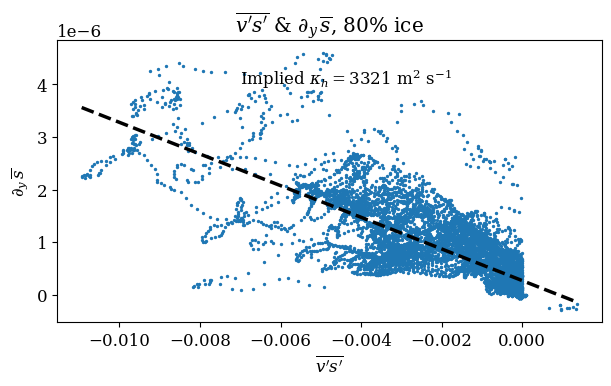

In [57]:
dI = 29
xData = np.ravel(VSbar[:dI,:,4])
yData = np.ravel(DsaltDy[:dI,:,4])
xData[(xData>=0) & (yData>=0)] = 0
yData[(xData>=0) & (yData>=0)] = 0

plt.figure(figsize=(6,3.75),layout="constrained")
plt.scatter(xData,yData,s=2)
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 80% ice")

seriesFit = poly.fit(xData,yData,1)
lineFit = seriesFit.linspace(5)
coefFit = seriesFit.convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.007,4e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)


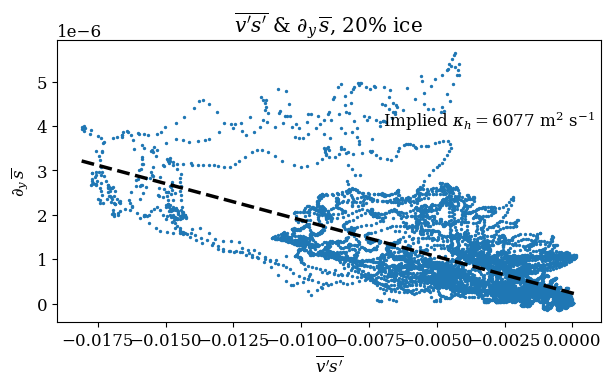

In [55]:
dI = 29
xData = np.ravel(VSbar[:dI,:,1])
yData = np.ravel(DsaltDy[:dI,:,1])
# xData[(xData>=0) & (yData>=0)] = 0
# yData[(xData>=0) & (yData>=0)] = 0

plt.figure(figsize=(6,3.75),layout="constrained")
plt.scatter(xData,yData,s=2)
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 20% ice")

seriesFit = poly.fit(xData,yData,1)
lineFit = seriesFit.linspace(5)
coefFit = seriesFit.convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.007,4e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)
